# Bowling Code Hw 

### Finding a way to measure the number of pins knocked down by a player

Player skill level determines roughly how many pins will be knocked down by the end of one frame. In this code, we will take the player's skill level from a Beta Distribution which ranges from 0 to 1, where 0 is a player's ability to hit absolutley no pins are hit ever, and 1 is the players ability to get a strike on every frame. We are using a Beta Distribution because this distribution can randomly give us probabilites for a player. Unless the player is a proffesional, the player is most likely not going to get a Strike every frame. Furthermore if the player is actually trying, then they will get some pins and not score a 0 for all of the rounds. Technically these values are possible but not likely, and this will depend on the alpha and beta of the distribution. The goal of this code is to be able to create a distribution of scores. From there we can obtain the average score.

To determine how strict we want our density of skill levels to be we are going to have to assign values for alpha and beta. We can see an example of a Players' distribtion by running the code below.

In [1]:
from scipy.stats import beta
from statistics import mean 
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Players Skill level in a Bowling Game')

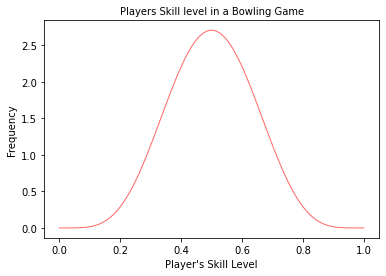

In [2]:
a = 6 #alpha
b = 6 #beta

x = np.linspace(0,1,100)

plt.plot(x, beta.pdf(x, a, b),
        'r-', lw=1, alpha=0.6, label='beta pdf')
plt.xlabel("Player's Skill Level")
plt.ylabel('Frequency')
plt.title('Player''s Skill level in a Bowling Game',fontsize=10)

### Defining Rolls, Spares and Strikes

Our next few blocks of code we define a roll as ***rolls***. In the same fucntion we examine the amount of ***pins_left*** and determine the number of ***pins_hit*** by the player, where ***pins_hit*** is initialized as.

$$\text{pins_hit} = [0,0,0,0,0,0,0,0,0,0]$$

The number of ***pins_hit*** is determined by ***round((Player's Skill level) $\cdot10$)***. From here we give the player some error becuase if the players' skill is .6, then they will always knock down 6 pins. This would apply to any value when ***Player's skill (Pskill)*** is between 0 and 1. To determine the player's error is quite subjective, as an average player might get a strike in a game while also not hitting any pins. The following "if" statements are our assumptions as to how many pins the player would hit based on their skill level. 

In [ ]:
#    Do not run. We run the entire code later on in its own cell.

if pins_hit == 0:
        
        sdPskill = [pins_hit,pins_hit+1, pins_hit+2,pins_hit+3]
        
    if pins_hit == 1:
        
        sdPskill = [pins_hit-1,pins_hit, pins_hit+1,pins_hit+2]
        
    if 1 < pins_hit <9:
        
        sdPskill = [0,pins_hit-2,pins_hit-1,pins_hit, pins_hit+1]
        
    if pins_hit == 9:
        
        sdPskill = [pins_hit-3,pins_hit-2,pins_hit-1, pins_hit,pins_hit+1]
    
    if pins_hit == 10:
        
        sdPskill = [pins_hit-2,pins_hit-1, pins_hit]
    

After the program has decided how many pins they can potentially hit, determined by ***sdPskill***, we can then use ***random.choice(sdPskill)*** to choose the number of pins they hit for that roll. Then we have a ***for*** loop where the range is equal to the number that was randomly chosen to replace the values of the 0's in ***pins_left*** with 1's. The sum of the new ***pins_left*** is the score of the player on the first roll. If the sum of ***pins left*** is equal to 10, then we return ***[sum(pins_left),0,"Strike!"]***. 



In [ ]:
# Do not run 

for i in range(y): 
    
        pins_left[i] = 1 
        
    ## If the player gets a strike on the first roll

    if sum(pins_left) == 10:
        
        #print("Stirke!")
        
        return [sum(pins_left),0,"Strike!"]
    
    tot_points1 = sum(pins_left)

If the sum of ***pins_left*** is not 10 at this point in the function, then this implies that there are still zeroes in ***pins_left***. Taking out the ones and leaving the zeroes, prepares us for our next roll. From here we choose a random number from ***sdPskill*** and this determines the amount of pins hit. However, if the amount of pins the player can potentially hit are not available (e.g. if the value chosen in ***sdPskill*** is greater than the number of pins to hit) in ***pins_left***, then we assume the player hits all the pins in the next roll. Here we check to see if the player has a spare. If they do, the function returns ***[tot_points1,tot_points2,"Spare!"]***. Otherwise we assume the player has an open frame and returns ***[tot_points1,tot_points2,"Open Frame!"]***.

In [ ]:
# Do not run

while 1 in pins_left:
        
        pins_left.remove(1)

    ## Roll two will now begin. Same idea with the first roll    
    ## Except now we take into account that the amount of pins hit 
    ## (determined by the players skill level), 
    ## may be higher than the number of pins available to hit. 
    
    y = random.choice(sdPskill)
    
if y > len(pins_left):
        
    y = len(pins_left)
        
    # Displays the amount of pins the player hit.    
    
for i in range(y): 
       
    pins_left[i] = 1 
       
tot_points2 = sum(pins_left)
    
#print("Total number of pins hit after the second roll: ", 
# pins_left,"total points accumalated: ", tot_points1+tot_points2)
    
if tot_points1+tot_points2 == 10:
        
    return [tot_points1,tot_points2,"Spare!"]
        
return [tot_points1,tot_points2,"Open Frame!"]

The cells above (cells 5 to 7) compose the fucntion called ***rolls** defined below.

In [9]:
#run this

def rolls(Pskill):
    
    pins_left = [0,0,0,0,0,0,0,0,0,0]
    
    pins_hit = round(Pskill*10)
    
    ## based on their skill level, the player can knock down a,b, 
    ## or c number of pins. This is displayed as [a,b,c] in sdPskill.
    
    if pins_hit == 0:
        
        sdPskill = [pins_hit,pins_hit+1, pins_hit+2,pins_hit+3]
        
    if pins_hit == 1:
        
        sdPskill = [pins_hit-1,pins_hit, pins_hit+1,pins_hit+2]
        
    if 1 < pins_hit <9:
        
        sdPskill = [0,pins_hit-2,pins_hit-1,pins_hit, pins_hit+1]
        
    if pins_hit == 9:
        
        sdPskill = [pins_hit-3,pins_hit-2,pins_hit-1, 
                    pins_hit,pins_hit+1]
    
    if pins_hit == 10:
        
        sdPskill = [pins_hit-2,pins_hit-1, pins_hit]
    
    ## creates some error among the player. 
    
    y = random.choice(sdPskill)
     
    ## Displays the amount of pins the player hit.
    
    for i in range(y): 
    
        pins_left[i] = 1 
        
    ## If the player gets a strike on the first roll

    if sum(pins_left) == 10:
        
        #print("Stirke!")
        
        return [sum(pins_left),0,"Strike!"]
    
    tot_points1 = sum(pins_left)
    
    #print("Total number of pins hit after the first roll: ", 
    # pins_left,"total points accumalated: ", tot_points1)

    #print(pins_left)
    
    ## Prepares for roll two. The pins that were not hit on roll one 
    ## will now be aimed for in roll two. 
    
    ## Removes the pins that were hit. 
    
    while 1 in pins_left:
        
        pins_left.remove(1)

    ## Roll two will now begin. Same idea with the first roll    
    ## Except now we take into account that the amount of pins hit 
    ## (determined by the players skill level), 
    ## may be higher than the number of pins available to hit. 
    
    y = random.choice(sdPskill)
    
    if y > len(pins_left):
        
        y = len(pins_left)
        
    # Displays the amount of pins the player hit.    
    
    for i in range(y): 
       
        pins_left[i] = 1 
       
    tot_points2 = sum(pins_left)
    
    #print("Total number of pins hit after the second roll: ", 
    # pins_left,"total points accumalated: ", tot_points1+tot_points2)
    
    if tot_points1+tot_points2 == 10:
        
        return [tot_points1,tot_points2,"Spare!"]
        
    return [tot_points1,tot_points2,"Open Frame!"]

## Defining a Game

We are now ready to create the rules for a game! First, we append 10 rolls to ***frames***. After this, we check ***frames*** for any elements that have the string "Spare!" or "Strike!" in it. 

If the element contains the string "Spare!" and if it is not the last element in the list ***frames***, add the next element of ***frames*** to the original score, specifically ***tot_points1***. Finally we append this score to a new list called ***scores***.

If the element contains the string "Stirke!" and if it is not the last element in the list ***frames***, add the next two elements, **tot_points1** and ***tot_points2***, to the original score. 

If the element contains a "Spare!" and if it is the last element, call the funtion ***rolls*** again then add ***tot_points_1*** to the original score.

If the element contains a "Strike!" and if it is the last element, call the funtion ***rolls*** again then add ***tot_points1*** and ***tot_points2*** to the original score.

After appending all the summed scores to ***scores*** for each frame, we sum up the true total of each frame.



In [7]:


def Game(Pskill):
    # print("Player's skill level:", Pskill)
    frames = []
    scores = []
    ## Spares return [total1, total2, "Spare!"]
    ## Strikes return [total1, "Strike!"]
    ## Open Frames return [total1, total2, "Open Frame!"]
    
    for i in range(10):
        
        frames.append(rolls(Pskill))
    
    # print ("Frames before checking for spares and strikes: ",frames)
    # print ("Length of Frames is: ",len(frames))
    # print ("Frame 0 is: ",frames[0])
    # print (" ")
    
    for j in range(10):
        
        if "Spare!" in frames[j] and j < 9:
            
            scores.append(frames[j][0]+frames[j][1]+frames[j+1][0]) 
              
        if "Spare!" in frames[j] and j == 9:
                
            r = rolls(Pskill)
                
            score1 = r[0]
            
            score2 = r[1]
            
            scores.append(frames[j][0]+frames[j][1]+score1)
              
        if "Strike!" in frames[j] and j < 9:
            
            scores.append(frames[j][0]+frames[j][1]+frames[j+1][0]+
                          frames[j+1][1]) 
            
        if "Strike!" in frames[j] and j == 9:
                
            r = rolls(Pskill)
                
            score1 = r[0]
            
            score2 = r[1]
            
            scores.append(frames[j][0]+frames[j][1]+score1 +score2)
        
              
        if "Open Frame!" in frames[j]:
            
            scores.append(frames[j][0]+frames[j][1])
            
    # print ("Frames After checking for spares and strikes: ",frames)
    # print("Score List: ", scores)
    # print("Sum of Scores is: ",sum(scores))
    # print (" ")
    
    return sum(scores)

## Gathering Data for the Simulation 

Finally, we are able to plot our distribution of scores based on the amount of games we want to play ***games***, and the $\alpha$ and $\beta$ mentioned earlier. 

In [10]:
yvec = []
def final(games,a,b):
    
    for p in range(games):
    
        Pskill = random.betavariate(a,b)
        
        yvec.append(Game(Pskill))
    
    mu=mean(yvec)
    ## Shows the distributon of skill level

    plt.subplot(1,2,1)
    plt.plot(x, beta.pdf(x, a, b),
        'r-', lw=1, alpha=0.6, label='beta pdf')
    plt.xlabel("Player's Skill Level")
    plt.ylabel('Frequency')
    plt.title('Player''s Skill level in a Bowling Game',fontsize=10)
    
    ## Shows the distribution of scores for each game
    
    plt.subplot(1,2,2)
    n, bins, patches = plt.hist(x=yvec, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.axvline(mu,color = 'r')
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Total Score')
    plt.title('Score per Bowling Game',fontsize=10)
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else 
             maxfreq + 10)
    
    print("mean:", round(mu,3))
    print("The standard deviation of all the scores is",
          round(np.std(yvec),3))
    
    return plt.show()

mean: 79.31
The standard deviation of all the scores is 31.181


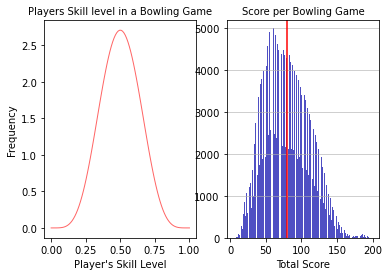

In [11]:
final(200000,6,6)

## Conclusion and Reflection

From the simulation, we get that the while playing 200,000 games we can find the mean score. As a result, we find that for 200000 games of bowling with the skill distribution being a beta function with $\alpha$ and $\beta$ being 6, the average score is around 79.3 with a standard deviation of 31.2. 

Remeber the boundaries, $a$ and $b$, ( $\alpha$ and $\beta$ ) determine how strict the skill distribuition is. Some things that could be more analysed is to what $a$ and $b$ should be so that we have the best possible representation of the distribution of scores. Also something that can be explored more is the list variable ***sdPskill*** as the variation of the number of pins hit could be more analysed and be coded more accurately than what is presented here.  